## Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10
pd.options.mode.chained_assignment = None

In [3]:
data = pd.read_csv('../Dataset/breast-cancer-wisconsin.data',names=['sample','clump thickness','cell size uniformity',\
                                                           'cell shape uniformity','marginal adhesion','epithelial cell size',\
                                                           'bare nuclei','bland chromatin','normal nucleoli','mitosis','class'])
data.head()

,sample,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
X = data[['clump thickness','cell size uniformity','class']]
y = data['class'].map({2:0,4:1}).reshape(-1,1)
print X.shape,y.shape

(699, 3) (699, 1)


In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [18]:
## SANITY CHECK
x = np.asarray([0,0,0])
sigmoid(x)

array([ 0.5,  0.5,  0.5])

In [19]:
def J(X,y,theta,m):
    error = sum(np.dot(y.T,np.log(sigmoid(np.dot(X,theta)))) + np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta)))))
    return (-1*error)/m

In [20]:
def gradient(X,y,theta,m):
    return np.dot(X.T,(sigmoid(np.dot(X,theta)) - y))/m

In [21]:
X.head()

,clump thickness,cell size uniformity,class
0,5,1,2
1,5,4,2
2,3,1,2
3,6,8,2
4,4,1,2


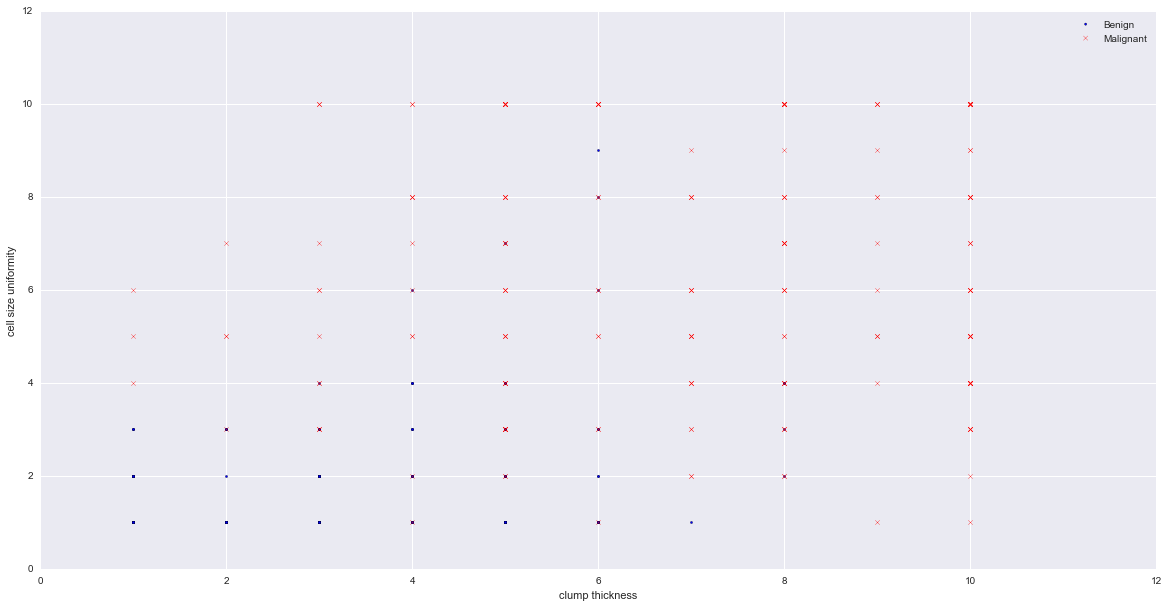

In [22]:
ax = X[X['class'] == 2].plot(kind='scatter',x='clump thickness',y='cell size uniformity',label='Benign',marker='.',c='b')
X[X['class'] == 4].plot(kind='scatter',x='clump thickness',y='cell size uniformity',label='Malignant',c='r',ax=ax,marker='x')

In [23]:
X['bias'] = np.ones(X.shape[0],)
try:
    X.pop('class')
except:
    print 'Already Removed'
X.head()

,clump thickness,cell size uniformity,bias
0,5,1,1.0
1,5,4,1.0
2,3,1,1.0
3,6,8,1.0
4,4,1,1.0


In [27]:
theta = np.asarray([0.0,0.0,0.0]).reshape(-1,1)
alpha = 0.1
m = X.shape[0]

In [28]:
error,iterations = [],[]
for i in range(2000):
    theta = theta - alpha*gradient(X,y,theta,m)
    error.append(J(X,y,theta,m))
    iterations.append(i)

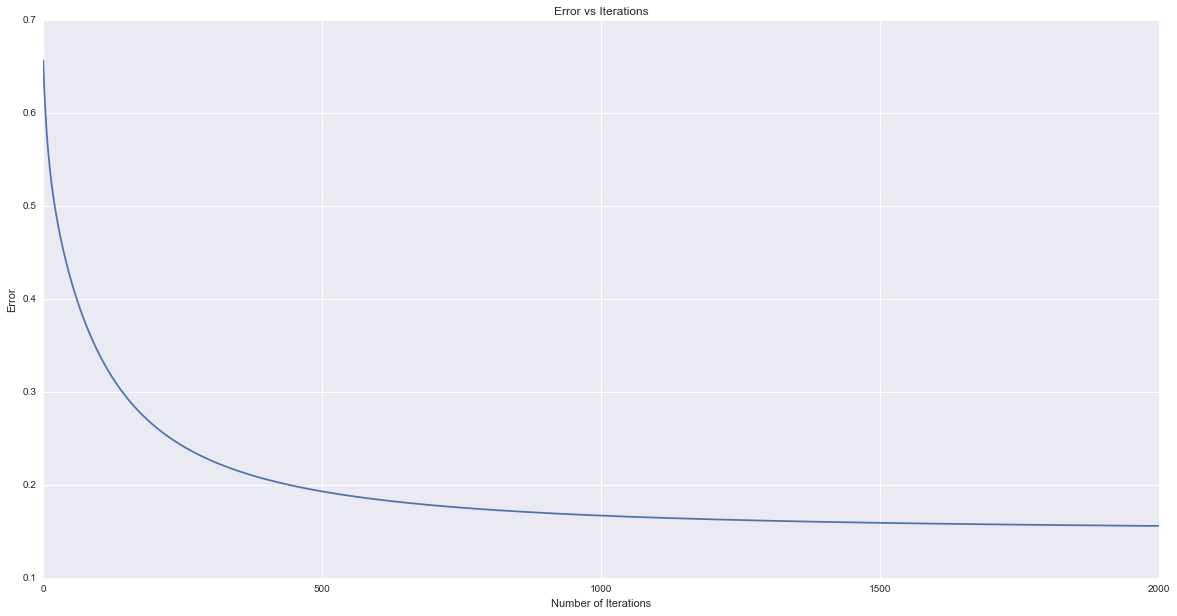

In [29]:
plt.plot(iterations,error)
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations')